# Data Exploration

In [1]:
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

## Load Data Files

In [3]:
data_path = "../wechat_algo_data1/"
output_path = "../predictions/"

In [4]:
# Training input data
feed_info = pd.read_csv(path.join(data_path, 'feed_info.csv'))
user_action = pd.read_csv(path.join(data_path, 'user_action.csv'))

In [5]:
# Test data
# testing_datafile = 'test_a.csv'   # Practice dataset
testing_datafile = 'test_b.csv'   # Actual dataset
test_data = pd.read_csv(path.join(data_path, testing_datafile))

In [6]:
print("len(feed_info) = %d\nlen(user_action) = %d\nlen(test_data) = %d" \
      % (len(feed_info), len(user_action), len(test_data)))

len(feed_info) = 106444
len(user_action) = 7317882
len(test_data) = 419646


## Attributes

In [7]:
feed_info.head()

,feedid,authorid,videoplayseconds,description,ocr,asr,bgm_song_id,bgm_singer_id,manual_keyword_list,machine_keyword_list,manual_tag_list,machine_tag_list,description_char,ocr_char,asr_char
0,43549,6165,38,104741 122649 8109 117252 65632 23463 118668 4...,139499 59421 82007 142955 27736 83577 52394 11...,142955 27736 83577 103956 32010 34170 89740 90...,19356.0,11703.0,15506;7715;17582,26334;219;25209;7715;18541,81;269;159;6,269 0.8525666;81 0.8525666;8 1.1e-07;306 0.0;2...,26439 5247 6426 3827 1882 26018 20744 22204 30...,25926 8491 13394 2203 26439 6243 33054 16435 1...,2203 26439 6243 33054 16435 16307 17070 24908 ...
1,77432,9386,60,35753 27736 146603 73055 11794 101761 11794 81...,35753 146603 73055 11794 101761 67496 16933 52...,146739 14368 79290 79213 47366 8109 33194 1198...,NaN,NaN,8199;18322;4243,24078;19924,194;267;159;6,267 0.99293476;194 0.99293476,31010 32495 6243 13923 15360 30483 2709 26084 ...,31010 32495 13923 15360 30483 2709 26084 15160...,7259 20851 5061 26207 17573 17531 15117 20072 ...
2,12921,2996,15,114413 107973 117252 27736 41035 32715 125374 ...,NaN,NaN,10288.0,11354.0,NaN,11696;6926,202;23;160;6,23 0.64771646;202 0.64771646,27077 10050 27464 20072 26018 6243 21492 14750...,NaN,NaN
3,34538,12577,18,60473 9864 8109 135558 108803 89307 37630 6481...,39654 95201 22675 49521 135558 108803 89307 37...,7446 47082 37630 99660 9844 113002 9844 113002...,24435.0,13645.0,5454;1197;3727,NaN,328;13;159;6,267 0.21298289;191 0.21298289;8 0.34298885;306...,21489 24672 2223 1882 4956 1545 10424 19791 12...,9015 21209 5026 11192 4956 1545 10424 19791 12...,20825 13395 14765 24513 7305 12837 10337 8885 ...
4,75414,7185,16,105860 4691 134820 55911 80449 79213 23233 139...,73055 66447 88970,104002 4438 104002 4438,23428.0,10730.0,17083;4123,8058;219;21639;15621;25209,81;269;159;6,269 0.86163938;81 0.86163938,25782 19583 7768 3907 14068 12681 5043 17859 1...,30483 23721 1518 22741 25118,23112 969 23112 969


In [8]:
user_action.head()

,userid,feedid,date_,device,read_comment,comment,like,play,stay,click_avatar,forward,follow,favorite
0,8,71474,1,1,0,0,1,500,5366,0,0,0,0
1,8,73916,1,1,0,0,0,250,1533,0,0,0,0
2,8,50282,1,1,0,0,0,750,1302,0,0,0,0
3,8,11391,1,1,0,0,1,3750,5191,0,0,0,0
4,8,27349,1,1,0,0,0,250,800,0,0,0,0


In [9]:
test_data.head()

,userid,feedid,device
0,116490,18545,2
1,19265,53010,2
2,194374,9003,1
3,19414,75730,2
4,6434,17863,2


## Missing Values

In [10]:
# Number of missing in each column
feed_info_missing = pd.DataFrame(feed_info.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
feed_info_missing['percentage'] = feed_info_missing['total'] / len(feed_info)
feed_info_missing

,total,percentage
feedid,0,0.000000
authorid,0,0.000000
videoplayseconds,0,0.000000
description,3358,0.031547
ocr,29606,0.278137
asr,27402,0.257431
bgm_song_id,52982,0.497745
bgm_singer_id,52982,0.497745
manual_keyword_list,35224,0.330916
machine_keyword_list,16757,0.157426


## Histograms

### Distributions of non-NaN 'bgm_song_id' and 'bgm_singer_id'

In [11]:
notNaN_song = feed_info[~feed_info['bgm_song_id'].isna()]['bgm_song_id']
notNaN_singer = feed_info[~feed_info['bgm_singer_id'].isna()]['bgm_singer_id']

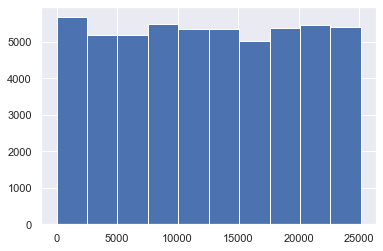

In [12]:
# bgm_song_id
plt.hist(notNaN_song);

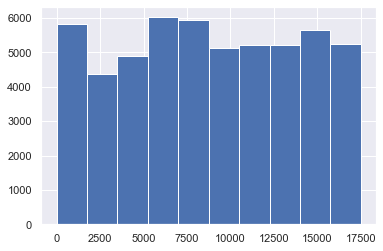

In [13]:
# bgm_singer_id
plt.hist(notNaN_singer);

### Distribution of 'date_'

In [14]:
user_action['date_'].value_counts()

11    614175
14    609036
10    596886
13    566627
3     543566
12    532038
9     512466
4     504623
8     500120
7     480460
1     478489
6     472726
2     461842
5     444828
Name: date_, dtype: int64

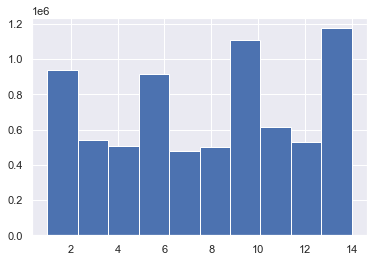

In [15]:
plt.hist(user_action['date_']);

### Distributions of 'play' and 'stay'

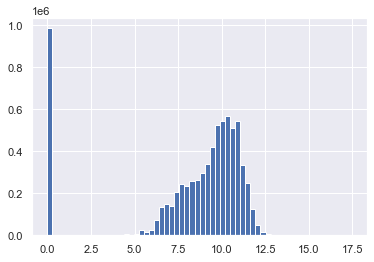

In [16]:
plt.hist(np.log(user_action['play'] + 1), bins = 60);

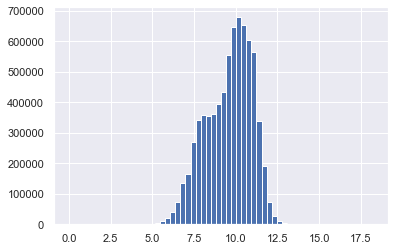

In [17]:
plt.hist(np.log(user_action['stay'] + 1), bins = 60);